In [11]:
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## comparison of geo smoothing, raw and taubin smoothed profiles.
##Taubin smoothing seems to be good at keeping peaks and especially troughs.
## Consider implementing in PADL

In [78]:
#taubin smoothing.
def taubin(profile, lam=0.5, n_iter=10):
        profile = profile.copy()
        for ii in range(n_iter):
            displ = nd.laplace(profile)
            profile += lam * displ
        return profile


In [96]:
import time
t1=time.time()
for k in range(500000):
    taubin(p, lam=0.5, n_iter=5)
t2=time.time()

print(t2-t1)

40.456690311431885


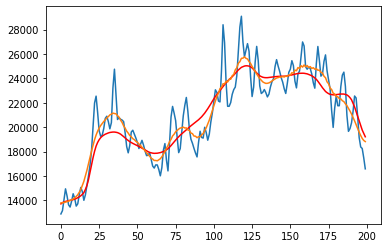

In [123]:
k=np.random.randint(10000)
with open('../../PADL/data/raw/euclid_raw_profiles_left.txt', 'r') as f:
    for pf in range(k):
        f.readline()
    p=np.array(f.readline().split(' ')).astype(float)
    
with open('../../PADL/data/raw/euclid_geo_profiles_left.txt', 'r') as f:
    for pf in range(k):
        f.readline()
    g=np.array(f.readline().split(' ')).astype(float)
    
p2=taubin(p,0.5,20)
plt.plot(p)
plt.plot(g, color='r')
plt.plot(p2)
plt.savefig('taubin2.png')

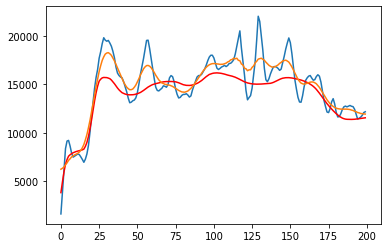

In [115]:
p2=taubin(p,0.5,20)
plt.plot(p)
plt.plot(g, color='r')
plt.plot(p2)
plt.savefig('taubin2.png')

In [72]:
profiles_lam=np.zeros((10,200))
profiles_iter=np.zeros((10,200))
for k in range(10):
    profiles_lam[k]=taubin(p,(k+1)/20.,20)
    profiles_iter[k]=taubin(p,0.1,(k+1)*10)
    

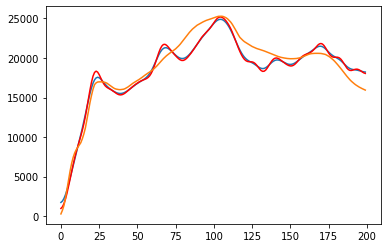

In [94]:
#plt.plot(profiles_lam[-1])
plt.plot(profiles_iter[-1])
plt.plot(profiles_iter[-5],'r')

plt.plot(g)